<a href="https://colab.research.google.com/github/Jfernando0120/SyS-Phyton-basics/blob/main/punto_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1.1

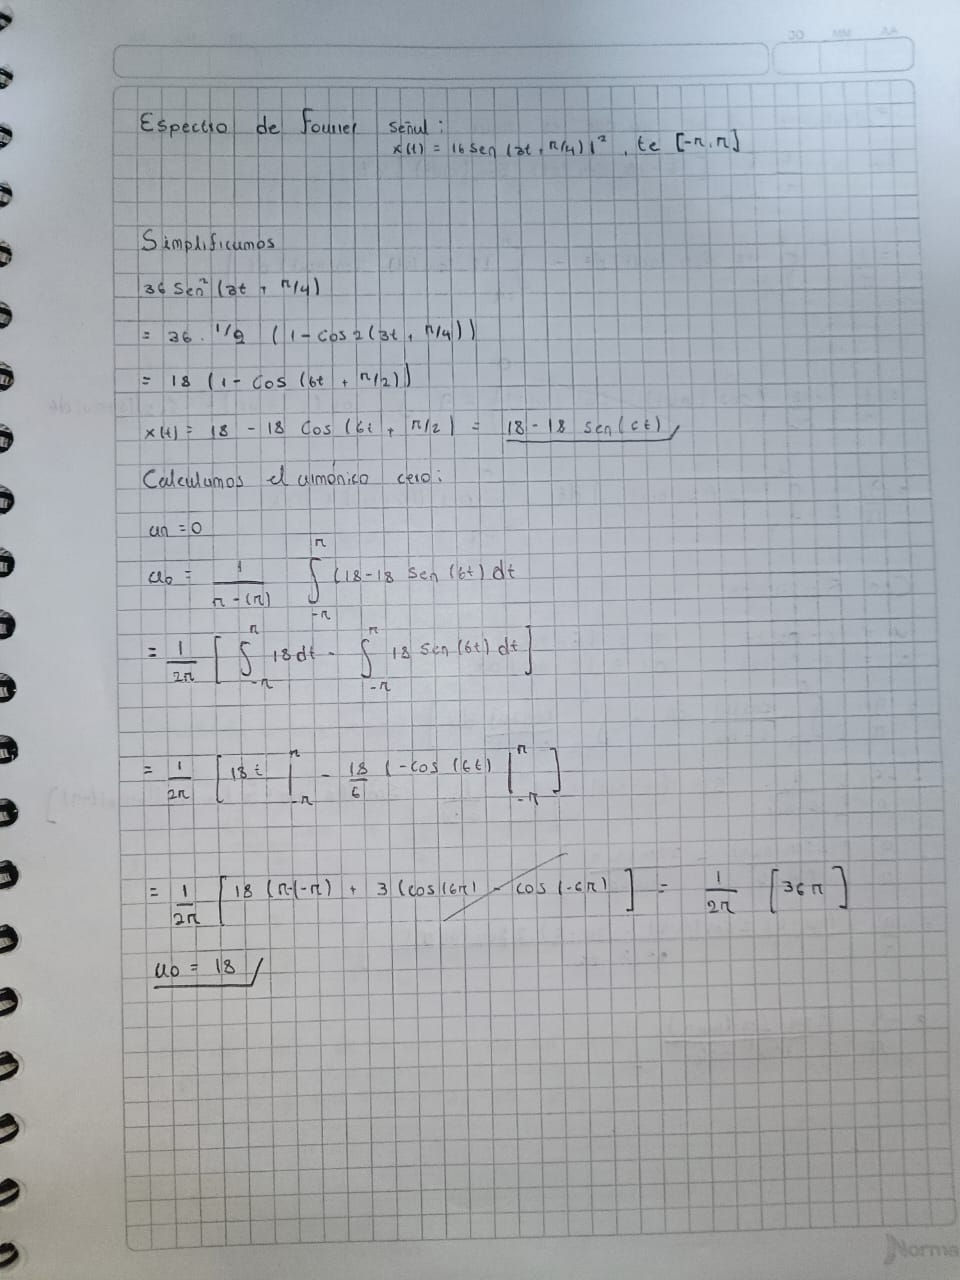

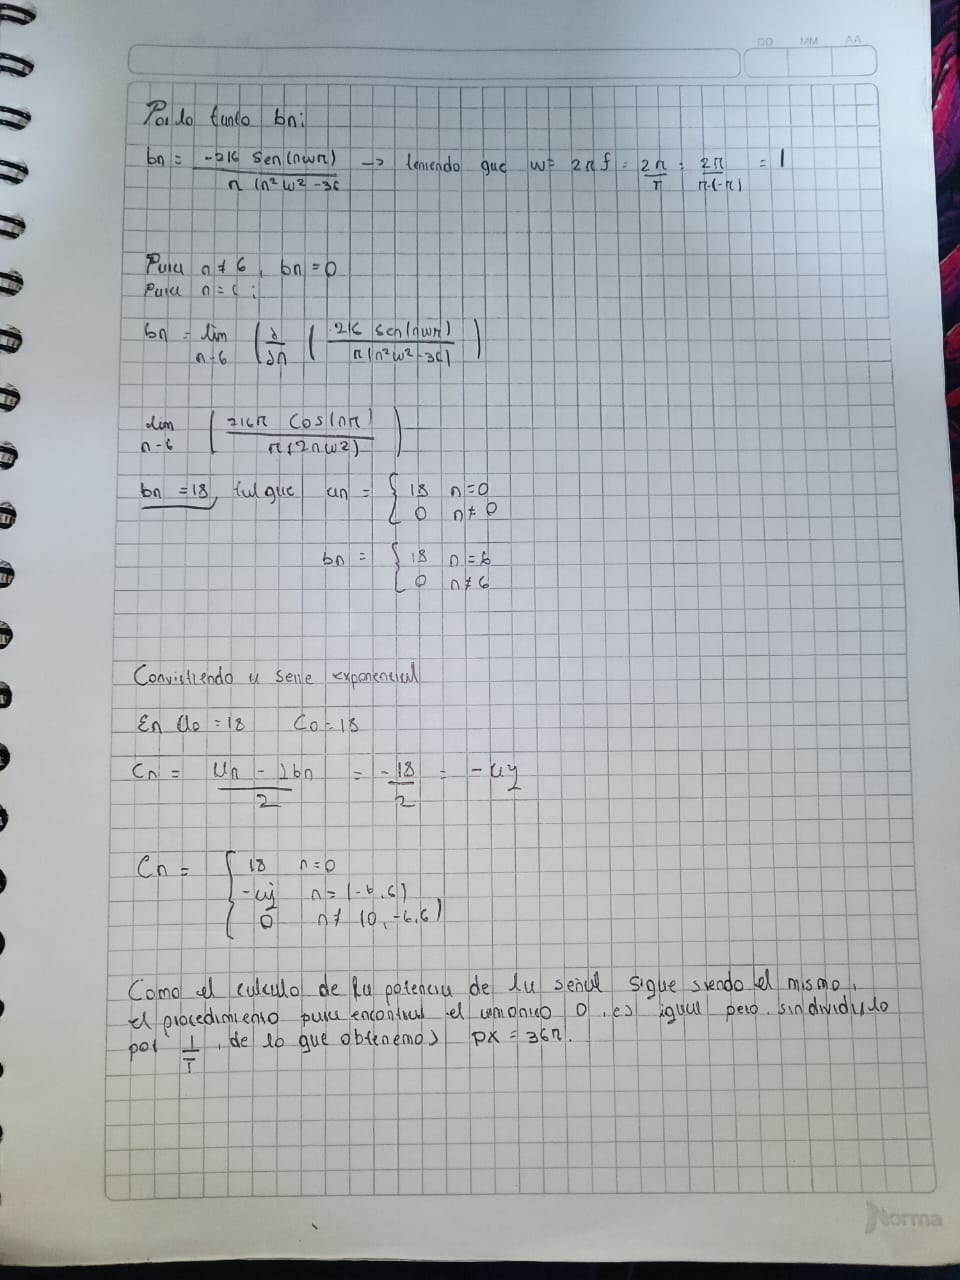

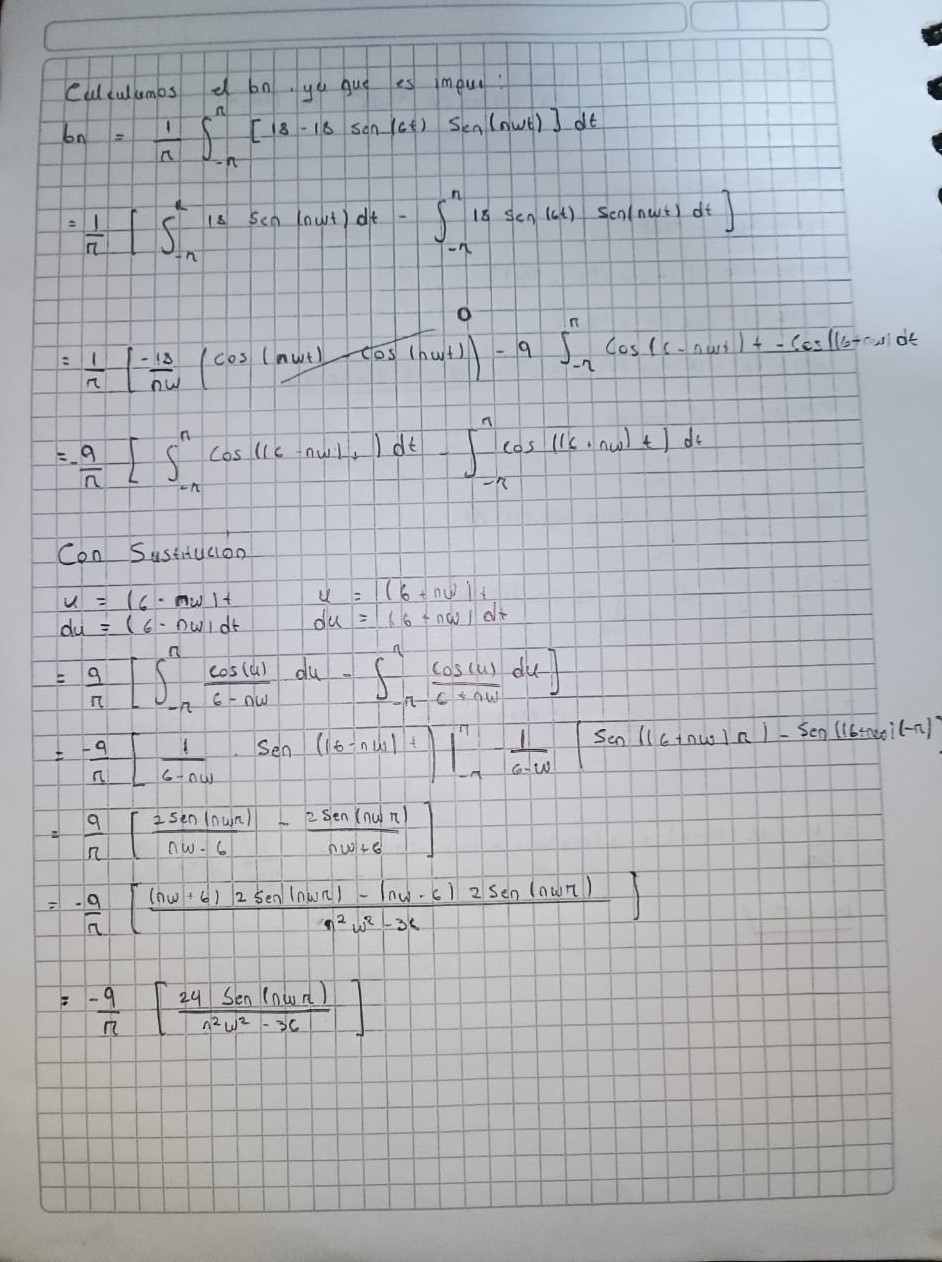

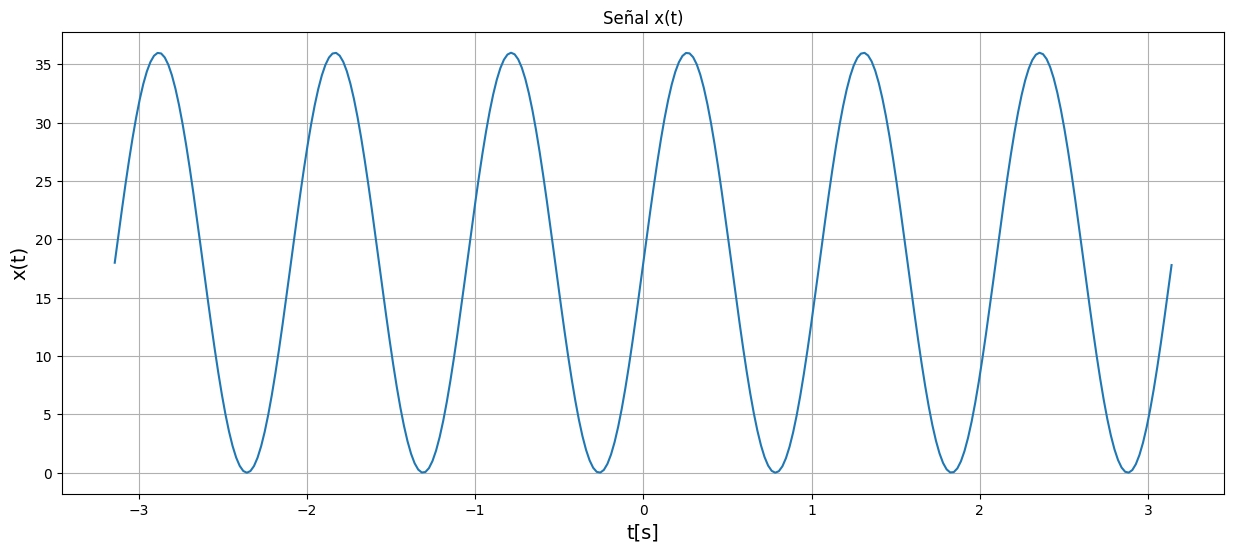

In [ ]:
import matplotlib as mpl
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import warnings
from ipywidgets import interact,IntSlider
from matplotlib import animation, rc
from IPython.display import HTML
warnings.filterwarnings("ignore")


#Señal seno
ti = -np.pi
tf = np.pi
T = tf - ti
Fo = 3/2*np.pi
Fs = 2*Fo
Fs = 10*Fo
vt = np.arange(ti, tf, 1/Fs) #vector tiempo
x = np.abs(6*np.sin(3*vt + (np.pi/4)))**2
plt.figure(figsize=(15,6))
plt.grid()
plt.title("Señal x(t)")
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.plot(vt,x)
plt.show()


In [ ]:
#Matriz de armónicos
M = len(vt)
N = 10 #número de armónicos
Wo = 2*np.pi/T #frecuencia fundamental
bases = np.zeros((M,2*N+1),dtype=np.complex_) #matriz
for n in range(-N,N+1,1):
    bases[:,n+N] = np.exp(1j*n*Wo*vt)
bases.shape

(297, 21)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(vt,np.real(bases[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(vt,np.imag(bases[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(vt,x,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return

interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

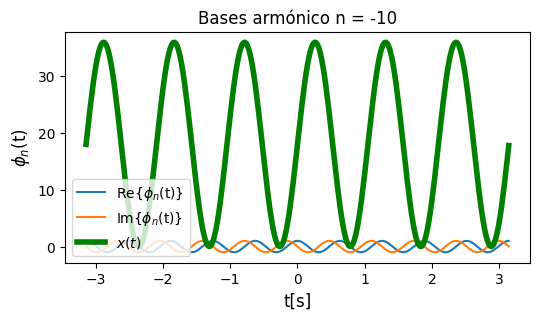

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,3))
#gráfico interactivo
def update(n):
    ax.clear()
    ax.plot(vt,np.real(bases[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]",fontsize = 12)
    ax.set_ylabel("$\phi_n$(t)",fontsize = 12)
    ax.plot(vt,np.imag(bases[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    ax.plot(vt,x,'g',linewidth=4,label='$x(t)$')
    ax.set_title(f'Bases armónico n = {n}')
    ax.legend(loc='lower left')
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(-N,N,1), blit=False)
rc('animation', html='jshtml')
anim

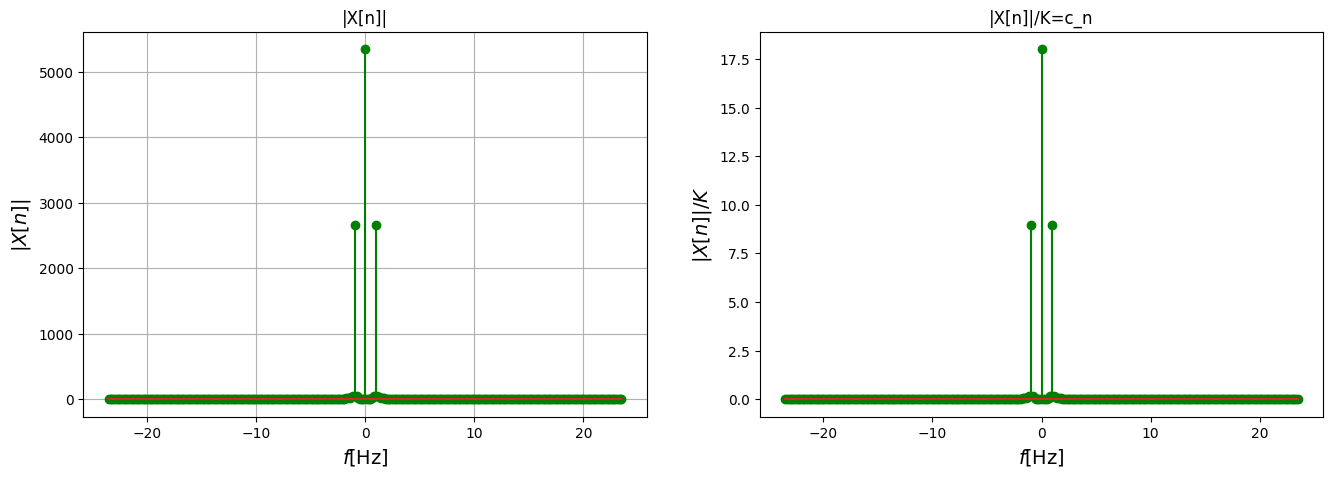

In [ ]:
#TRANSFORMADA DE FOURIER
vf = np.fft.fftfreq(len(x),1/Fs) #calculo vector de frecuencias
XF = np.fft.fft(x) #cálculo FFT

plt.figure(figsize=(16,5))

plt.subplot(121)
plt.stem(vf,abs(XF),'g')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(122)
plt.stem(vf,abs(XF)/len(vf),'g')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)

plt.show()

In [ ]:
# Para calcular el armónico cero
t, n, Wo = sym.symbols('t n Wo')

x2 = sym.Abs(6 * sym.sin(3 * t + sym.pi / 4))**2

# Cálculo de A0
A0 = (1 / (2 * sym.pi)) * sym.integrate(x2, (t, -sym.pi, sym.pi))
print("A0 =", A0)

A0 = 18


In [ ]:
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
cn[N] = 18 #Nivel DC de la señal
cn[N - 6] = -9
cn[N + 6] = -9

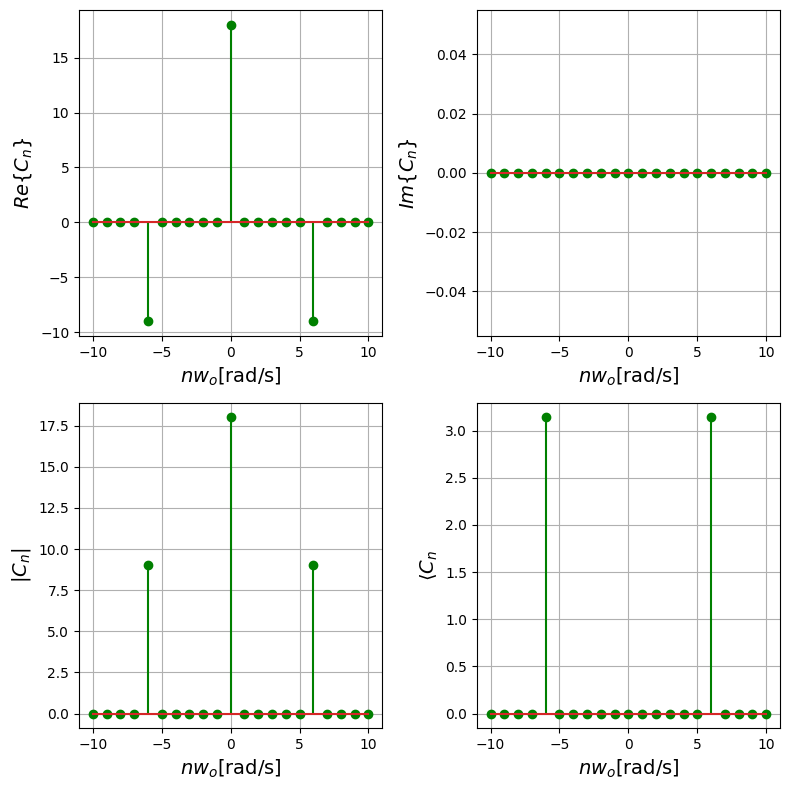

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'g')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'g')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'g')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'g')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Reconstrucción de la Señal

In [ ]:
t = sym.symbols('t', Real = True)
x3 = 6*sym.sin(3*t + sym.pi/4) #señal propuesta
x4 = np.abs(x3)**2 #señal en valor absoluto
Px = sym.integrate(x4, (t,-sym.pi, sym.pi))
print("La potencia de la señal es: ")
Px

La potencia de la señal es: 


36*pi

In [ ]:
import sympy as sym

t = sym.symbols('t')

# Define la señal x2
x2 = (sym.Abs(6 * sym.sin(3 * t + sym.pi / 4))**2)**2

# Calcula la potencia
potencia = sym.integrate(x2, (t, 0, 2*sym.pi)) / (2*sym.pi)

# Simplificar la expresión si es necesario
potencia_simplified = sym.simplify(potencia)

# Mostrar la potencia resultante
print("Potencia de x2:", potencia)
print("Expresión simplificada:", potencia_simplified)

Potencia de x2: 486
Expresión simplificada: 486


In [ ]:
#para calcular el error relativo y graficar
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/potencia #señal reconstruida
    xe = bases[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(vt,xe,color='r',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(vt,x,color='g',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>